<a href="https://colab.research.google.com/github/Lokendra47/Data-Analytics-Projects/blob/main/Day2_MSD7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/MS_Dhoni_ODI_record.csv')

#BAsics checks

print(df.head())
print(df.tail())

#Da





  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [ ]:
#Data cleaning - opposition name says 'v Aus' etc, we can remove 'v'

#df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df['opposition'] = df['opposition'].str.replace('v ','',regex=False)
#regex false means that first string ('v ') is not a regex but a literal string

print(df.opposition)

# Add a 'feature' - 'year' column using the match date column

#first convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['year'] = df['date'].dt.year.astype(int)
print(df.head())


0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object
  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  odi_number  year  
0     Chattogram 2004-12-23  ODI # 2199  2004  
1          Dhaka 2004-12-26  ODI # 2201  2004  
2          Dhaka 2004-12-27  ODI # 2202  2004  
3          Kochi 2005-04-02  ODI # 2235  2005  
4  Visakhapatnam 2005-04-05  ODI # 2236  2005  


In [ ]:
#Create a column to distinguish between out and not out
df.score  = df.score.apply(str)
df['not_out'] = np.where(df.score.str.endswith("*"),1,0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0


In [ ]:
#dropping the odi number feature because it adds no value to the analysis
print(df.drop(columns = 'odi_number'))  #temporary change
#df.drop(columns ='odi_number', inplace = True) #permanent change
df = df.drop(columns ='odi_number') # Same, but better syntax





    score runs_scored balls_faced strike_rate fours sixes   opposition  \
0       0           0           1           0     0     0   Bangladesh   
1      12          12          11      109.09     2     0   Bangladesh   
2      7*           7           2         350     0     1   Bangladesh   
3       3           3           7       42.85     0     0     Pakistan   
4     148         148         123      120.32    15     4     Pakistan   
..    ...         ...         ...         ...   ...   ...          ...   
345   56*          56          61        91.8     3     2  West Indies   
346   42*          42          31      135.48     4     1      England   
347    35          35          33      106.06     4     0   Bangladesh   
348   DNB           -           -           -     -     -    Sri Lanka   
349    50          50          72       69.44     1     1  New Zealand   

            ground       date  year  not_out  
0       Chattogram 2004-12-23  2004        0  
1            Dhak

In [ ]:
#Dropping those innings where dhoni did not bat and stoirng in a new dataFrame
# Takes all the columns, starting with ren_scored
df_new = df.loc[((df['score'] != 'DNB')& (df['score'] != 'TDNB')), 'runs_scored':]

In [ ]:
#Fixing the data types of numerical columns
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

First match: December 23, 2004
Last match: July 09, 2019
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate:87.56
Career average:50.58
Number of 100s: 10
Number of 50s: 73
Number of 4s 826
Number of 6s 229
opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


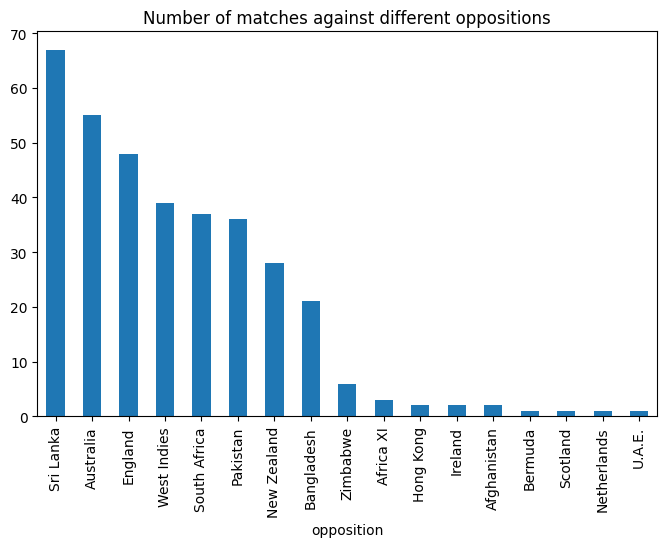

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int64


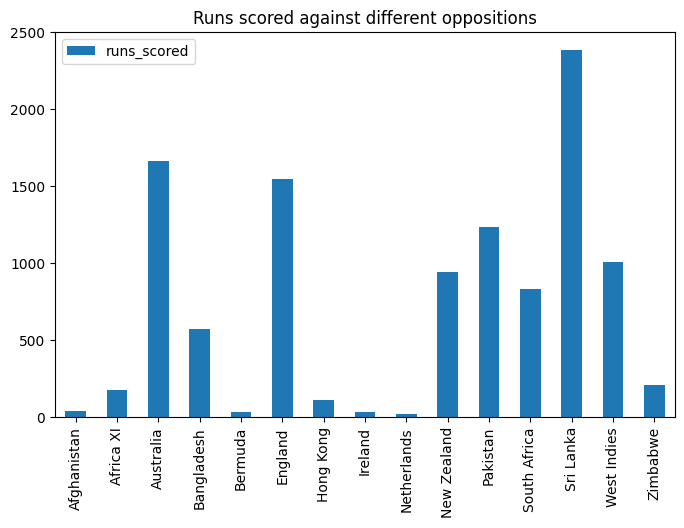

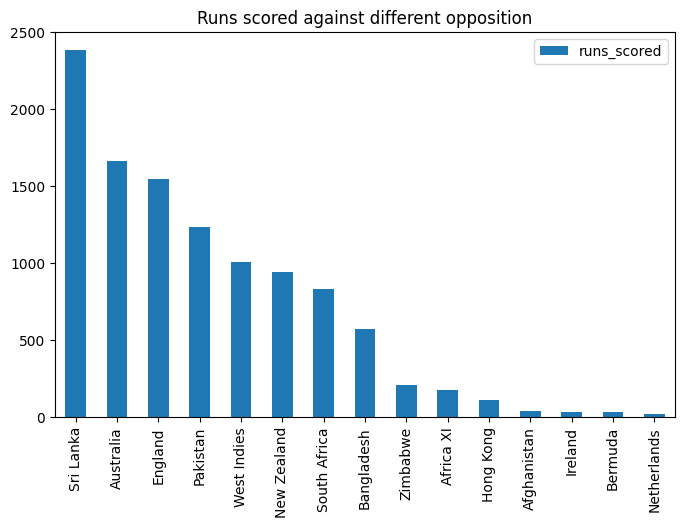

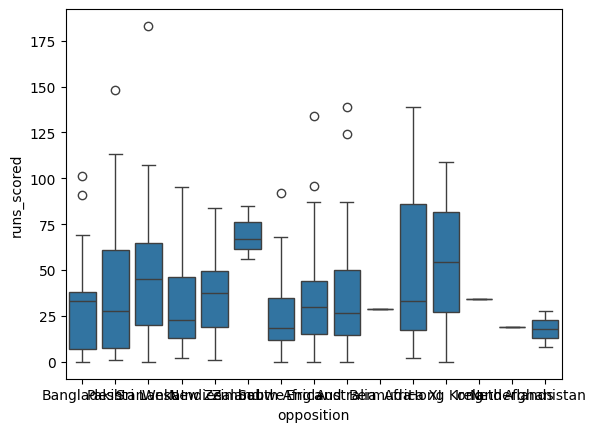

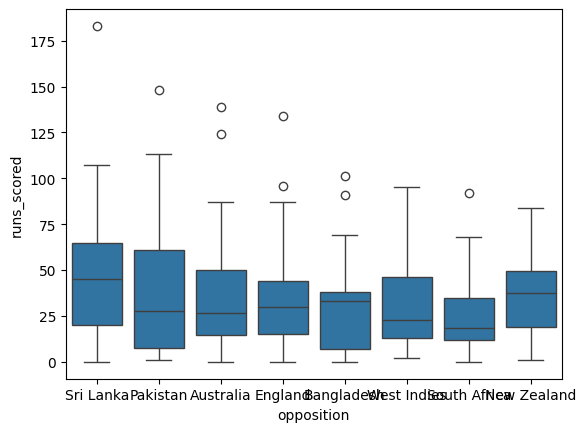

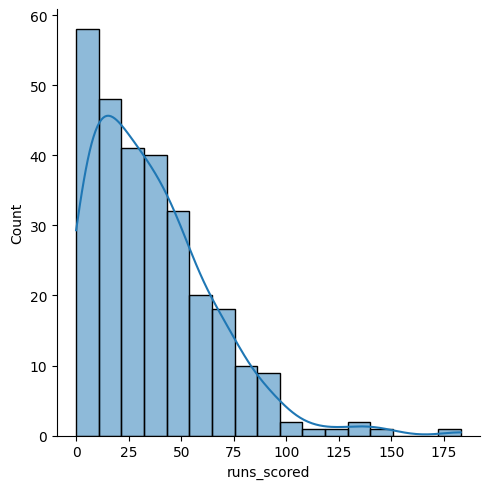

In [ ]:
# Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print('First match:' , first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print('Last match:' , last_match_date)
number_of_matches = df.shape[0] # number of matches played in career
print('Number of matches played:' , number_of_matches)

number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:' , number_of_inns)

not_outs = df_new['not_out'].sum() # number of not outs in career
print('Not outs:' , not_outs)

runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:' , runs_scored)

balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:' , balls_faced)

career_sr = (runs_scored / balls_faced) * 100 # career strike rate
print('Career strike rate:{:.2f}'.format(career_sr))

career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average:{:.2f}'.format(career_avg))

hundreds = (df_new['runs_scored'] >= 100).sum()
print('Number of 100s:', hundreds)
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print('Number of 50s:', fifties)

fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s', fours)

sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s', sixes)

# number of matches played against different oppositions
# Count the occurrences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8,5))
plt.show()

# Runs_scored against each team
# Group the DataFrame by 'opposition' column
grouped_by_opposition = df_new.groupby('opposition')
# Sum the 'runs_scored' column for each group
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

# sum_of_runs_scored is a series with a labelled index, which is opposition
# Convert it into a DataFrame and remove the index
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition', kind='bar', title='Runs scored against different oppositions', figsize=(8, 5))
plt.xlabel(None);
plt.show()

# Does not look good ... Let us sort it ...
sorted = runs_scored_by_opposition.sort_values(by='runs_scored', ascending=False)
sorted.plot(x='opposition', kind='bar', title='Runs scored against different opposition', figsize=(8,5))
plt.xlabel(None);
plt.show()

# Boxplot of runs against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_new)
plt.show()

# Looks crowded - Let us retain only major countries
#List of oppositions to filter
opposition_list = ['England', 'Australia', 'West Indies', 'South Africa', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Bangladesh']

#filter rows where 'oposition' is in the list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]
df_filtered = df_filtered.sort_values(by='runs_scored', ascending=False)
# Boxplot of runs against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered)
plt.show()


#histogram(distplot) with and without kde(Kernel Density Estimation)
sns.displot(data=df_filtered,x='runs_scored',kde=True)
plt.show()




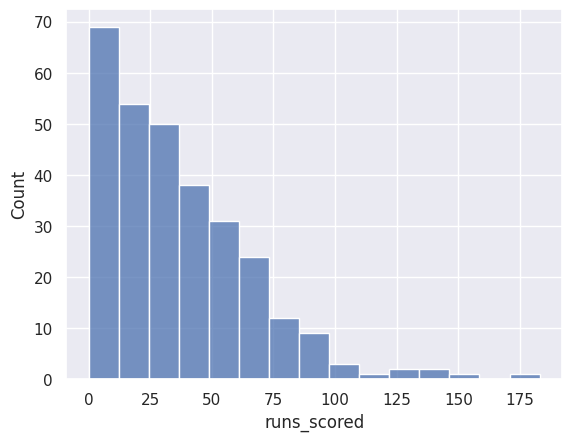

In [ ]:
#historgam with bins
sns.set(style ='darkgrid')
sns.histplot(data=df_new,x='runs_scored',bins=15)
plt.show()

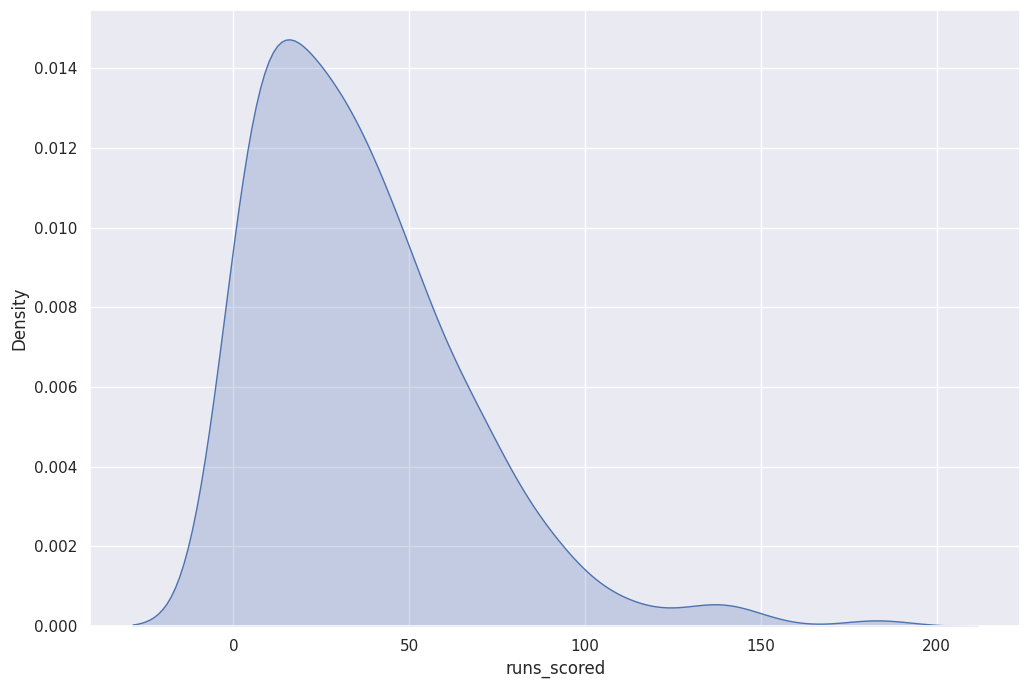

In [ ]:
#KDE Plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored',fill=True)
plt.show()


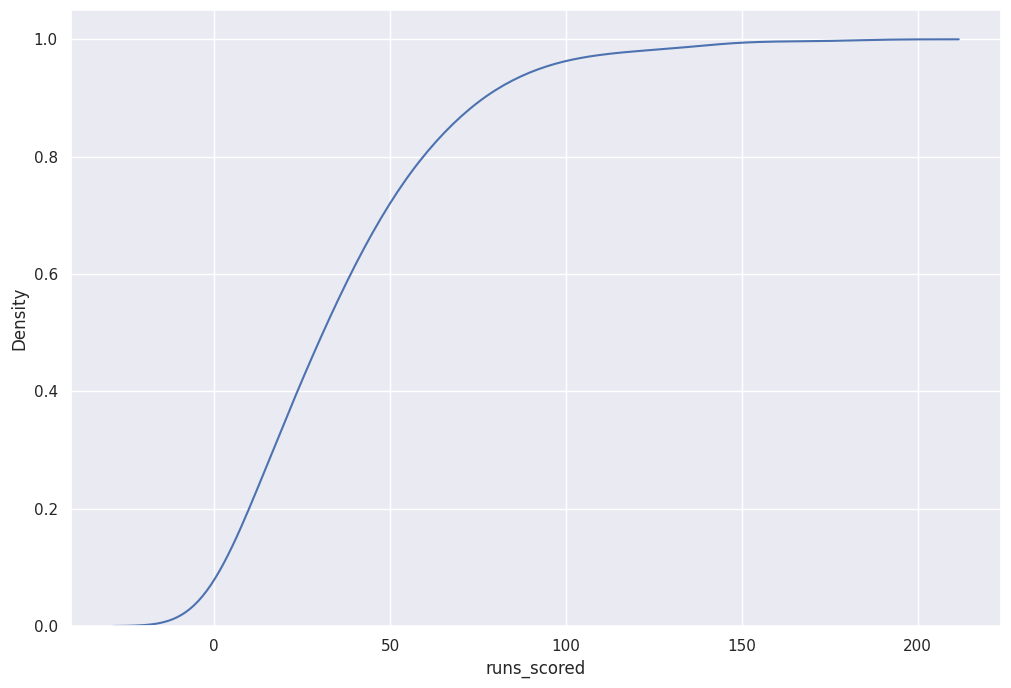

In [ ]:
#KDE plot with cumilitive probability
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored',cumulative=True)
plt.show()
#

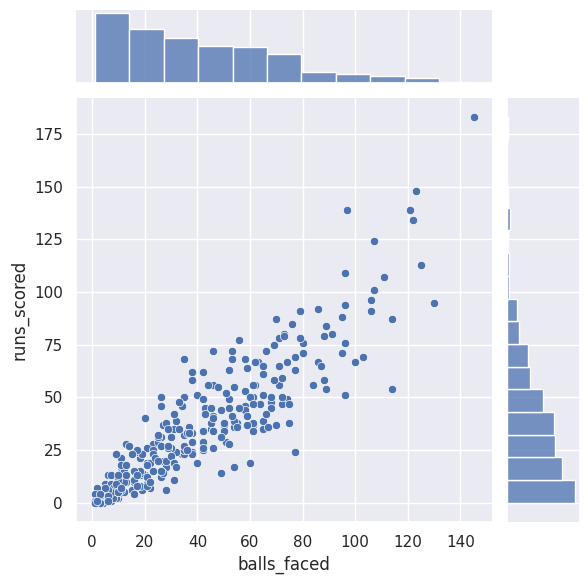

In [ ]:
# jointplot
sns.jointplot(data=df_new,x='balls_faced',y='runs_scored',kind='scatter')
plt.show()

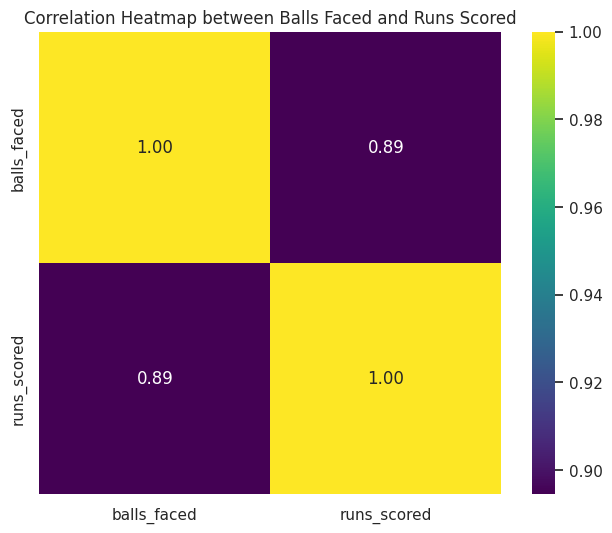

In [ ]:
#Heat Map
#Calculate the correlation matrix
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

#create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='viridis',square =True, fmt= ".2f")  #try cmap = 'coolwarm'
plt.title('Correlation Heatmap between Balls Faced and Runs Scored')
plt.show()


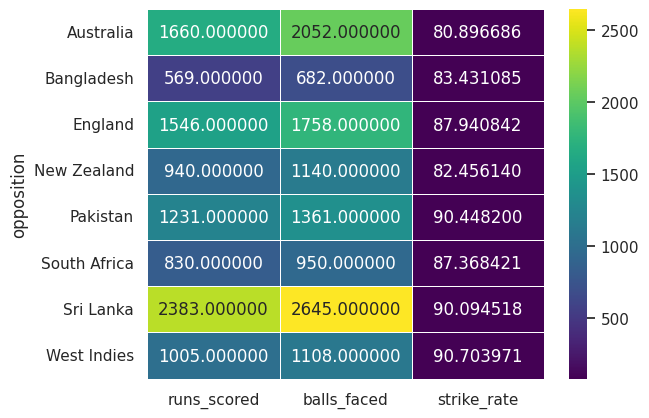

In [ ]:
#Calculate strike-rate per opposition and show as a heatmap
grouped_by_opposition = df_filtered.groupby('opposition')
agg_sum = grouped_by_opposition.agg({'runs_scored': 'sum', 'balls_faced': 'sum'})
df_strike_rate = agg_sum


#Calculate the strike rate
df_strike_rate['strike_rate'] =df_strike_rate['runs_scored'] / df_strike_rate['balls_faced'] * 100
sns.heatmap(df_strike_rate, linewidth=0.5, annot=True, fmt ='0f', cmap='viridis')
plt.show()




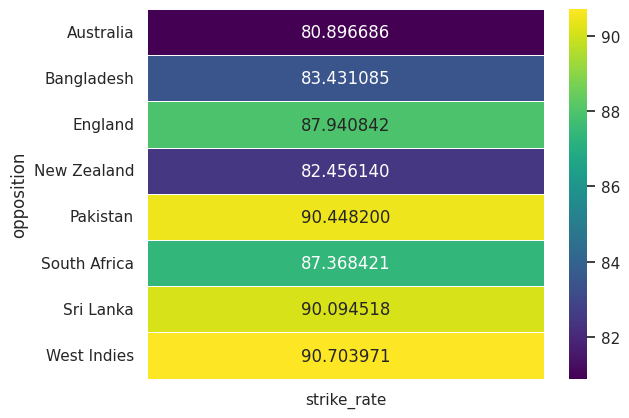

In [ ]:
#BAD graph -omly retain strike rate column
df_strike_rate = df_strike_rate[['strike_rate']]
sns.heatmap(df_strike_rate, linewidth=0.5, annot=True, fmt ='0f', cmap='viridis')
plt.show()
